<a href="https://colab.research.google.com/github/Ajay-kr-02/Hamoye_2022_Internship/blob/main/https%3A/github.com/nagamouni/Capstone_project_ridge_lasso/issues/1/Hamoye_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Women's International Football Results**

### **Problem Statement**


*   To predict the results of Women's International Football of different countries



#### **Data Source**
This data was sourced from the Project Leader's github repo via the link: https://github.com/nagamouni/Capstone_project_ridge_lasso

### **Data Preprocessing**

In [1]:
url1 = 'https://raw.githubusercontent.com/nagamouni/Capstone_project_ridge_lasso/main/results.csv'
url2 = 'https://raw.githubusercontent.com/nagamouni/Capstone_project_ridge_lasso/main/shootouts.csv'

In [2]:
import pandas as pd
df_results = pd.read_csv(url1, sep=',')
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [3]:
df_shootouts = pd.read_csv(url2, sep=',')
df_shootouts.head()

,date,home_team,away_team,winner
0,1995-06-13,Sweden,China PR,China PR
1,1999-07-10,Brazil,Norway,Brazil
2,1999-07-10,United States,China PR,United States
3,2011-07-09,England,France,France
4,2011-07-10,Brazil,United States,United States


In [4]:
print(f'Dimension of results_csv: {df_results.shape}')
print(f'Dimension of shootouts_csv: {df_shootouts.shape}')

Dimension of results_csv: (4314, 9)
Dimension of shootouts_csv: (9, 4)


In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4314 non-null   object
 1   home_team   4314 non-null   object
 2   away_team   4314 non-null   object
 3   home_score  4314 non-null   int64 
 4   away_score  4314 non-null   int64 
 5   tournament  4314 non-null   object
 6   city        4314 non-null   object
 7   country     4314 non-null   object
 8   neutral     4314 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 274.0+ KB


In [6]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       9 non-null      object
 1   home_team  9 non-null      object
 2   away_team  9 non-null      object
 3   winner     9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [7]:
# check for null values
df_results.isna().values.any()

False

In [8]:
df_shootouts.isna().values.any()

False

No missing data is found in this dataset. We continue by converting the `date` column of both csv files to datetime data type. 

In [9]:
# Convert 'date' column in df_results to datetime
df_results['date'] = pd.to_datetime(df_results['date'])
df_results['Match_year'] = df_results['date'].dt.year
df_results['Match_month'] = df_results['date'].dt.month
df_results['Match_day'] = df_results['date'].dt.day_name()
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Match_year,Match_month,Match_day
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,1969,11,Saturday
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,1969,11,Saturday
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,1969,11,Sunday
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,1969,11,Sunday
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,1975,8,Monday


In [10]:
# Convert 'date' column in df_shootouts to datetime
df_shootouts['date'] = pd.to_datetime(df_shootouts['date'])
df_shootouts['Match_year'] = df_shootouts['date'].dt.year
df_shootouts['Match_month'] = df_shootouts['date'].dt.month
df_shootouts['Match_day'] = df_shootouts['date'].dt.day_name()
df_shootouts.head()

,date,home_team,away_team,winner,Match_year,Match_month,Match_day
0,1995-06-13,Sweden,China PR,China PR,1995,6,Tuesday
1,1999-07-10,Brazil,Norway,Brazil,1999,7,Saturday
2,1999-07-10,United States,China PR,United States,1999,7,Saturday
3,2011-07-09,England,France,France,2011,7,Saturday
4,2011-07-10,Brazil,United States,United States,2011,7,Sunday


In [11]:
# converting the timestamp column as index of the dataframe
df_results.index = df_results['date']
df_shootouts.index = df_shootouts['date']

One of the most important tips while working with time-series data is to set the datetime column as the index of the dataset. This helps us to analyze things quickly; thus, we drop the timestamp column (date) in the result and shootout datasets because it is no longer needed. 

In [12]:
df_results.drop(columns='date', inplace=True)
df_results.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Match_year,Match_month,Match_day
date,,,,,,,,,,,
1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,1969,11,Saturday
1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,1969,11,Saturday
1969-11-02,England,France,2,0,Euro,Turin,Italy,True,1969,11,Sunday
1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,1969,11,Sunday
1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,1975,8,Monday


In [13]:
df_shootouts.drop(columns='date', inplace=True)
df_shootouts.head()

,home_team,away_team,winner,Match_year,Match_month,Match_day
date,,,,,,
1995-06-13,Sweden,China PR,China PR,1995,6,Tuesday
1999-07-10,Brazil,Norway,Brazil,1999,7,Saturday
1999-07-10,United States,China PR,United States,1999,7,Saturday
2011-07-09,England,France,France,2011,7,Saturday
2011-07-10,Brazil,United States,United States,2011,7,Sunday


In [14]:
# Descriptive statistics
df_results.describe(include='all')

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Match_year,Match_month,Match_day
count,4314,4314,4314.000000,4314.000000,4314,4314,4314,4314,4314.000000,4314.000000,4314
unique,188,184,NaN,NaN,27,994,144,2,NaN,NaN,7
top,United States,Denmark,NaN,NaN,UEFA Euro qualification,Lagos,Portugal,False,NaN,NaN,Saturday
freq,262,145,NaN,NaN,1241,88,587,2455,NaN,NaN,917
mean,NaN,NaN,2.324525,1.426750,NaN,NaN,NaN,NaN,2005.733426,6.538479,NaN
std,NaN,NaN,2.784961,1.996946,NaN,NaN,NaN,NaN,10.141812,3.146847,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1969.000000,1.000000,NaN
25%,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1999.000000,4.000000,NaN
50%,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,2007.000000,6.000000,NaN
75%,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,2015.000000,9.000000,NaN


In [15]:
df_shootouts.describe(include='all')

,home_team,away_team,winner,Match_year,Match_month,Match_day
count,9,9,9,9.000000,9.000000,9
unique,7,6,8,NaN,NaN,5
top,Sweden,China PR,United States,NaN,NaN,Saturday
freq,2,2,2,NaN,NaN,4
mean,NaN,NaN,NaN,2009.111111,6.111111,NaN
std,NaN,NaN,NaN,9.439868,1.615893,NaN
min,NaN,NaN,NaN,1995.000000,2.000000,NaN
25%,NaN,NaN,NaN,1999.000000,6.000000,NaN
50%,NaN,NaN,NaN,2011.000000,7.000000,NaN
75%,NaN,NaN,NaN,2015.000000,7.000000,NaN


# **Exploratory Data Analysis**

Let's check number of scores by teams at home ground and away ground.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
home_data = df_results.groupby('home_team').sum()['home_score'].sort_values(ascending=False).head(10) # Getting Top 10 Teams At Home Ground

In [18]:
away_data = df_results.groupby('away_team').sum()['away_score'].sort_values(ascending=False).head(10) # Getting Top 10 Teams At Away Ground


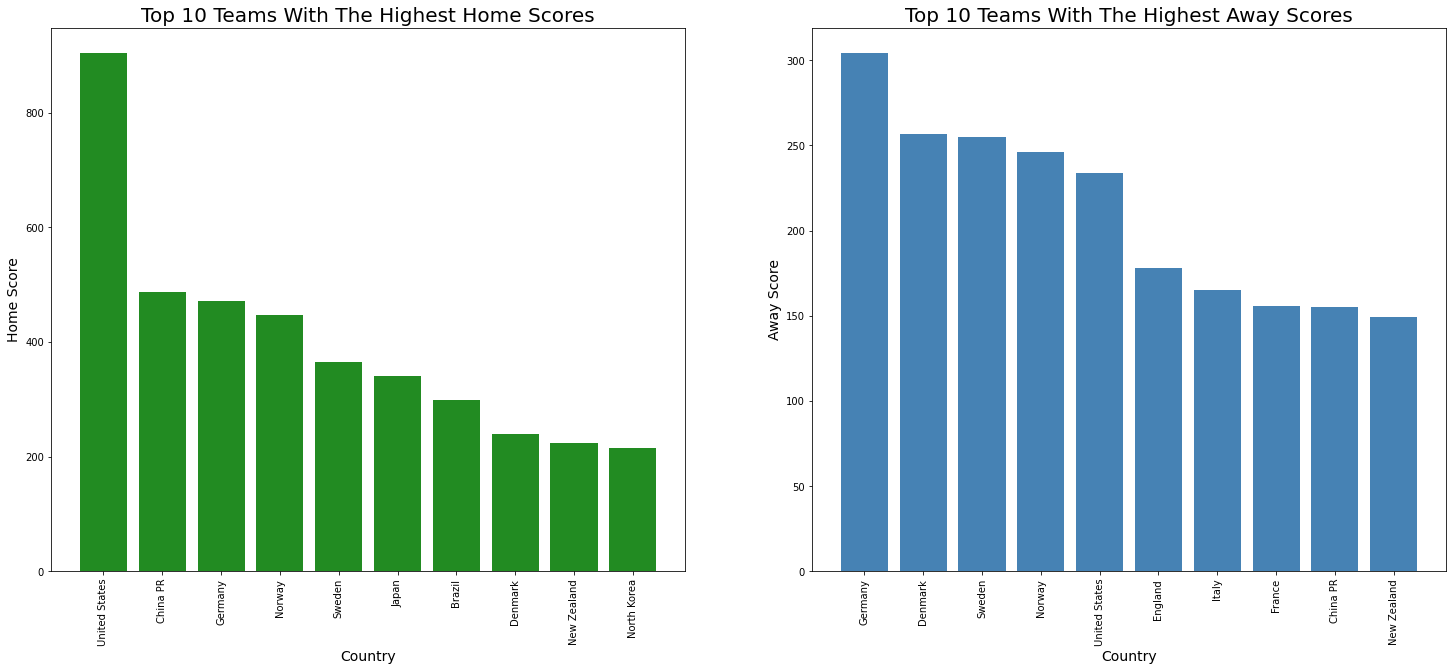

In [19]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.bar(x=list(home_data.index), height=list(home_data.values),color='forestgreen')
plt.xticks(rotation=90)
plt.xlabel('Country',  fontsize=14)
plt.ylabel('Home Score',  fontsize=14)
plt.title('Top 10 Teams With The Highest Home Scores', fontsize=20)
plt.subplot(1,2,2)
plt.bar(x=list(away_data.index), height=list(away_data.values) ,color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Away Score',  fontsize=14)
plt.title('Top 10 Teams With The Highest Away Scores', fontsize=20)
plt.show()

**United States has maximum home score and Germany has maximum away score.** 

## Now Let's See How The Top 10 Hosting Countries Performed at Their Home



In [20]:
df_results_copy=pd.read_csv(url1, sep=',')
df_results_copy['date']=pd.to_datetime(df_results_copy['date'])
df_results_copy['year']=df_results_copy['date'].apply(lambda x: x.year)

In [21]:
number=[]
for x in df_results_copy['country'].unique():
    number.append(df_results_copy[df_results_copy['country']==x]['year'].nunique())
df_host=pd.DataFrame({'Host Country':df_results_copy['country'].unique(),'Number of Hosting':number}).sort_values(by='Number of Hosting',ascending=False).head(10)

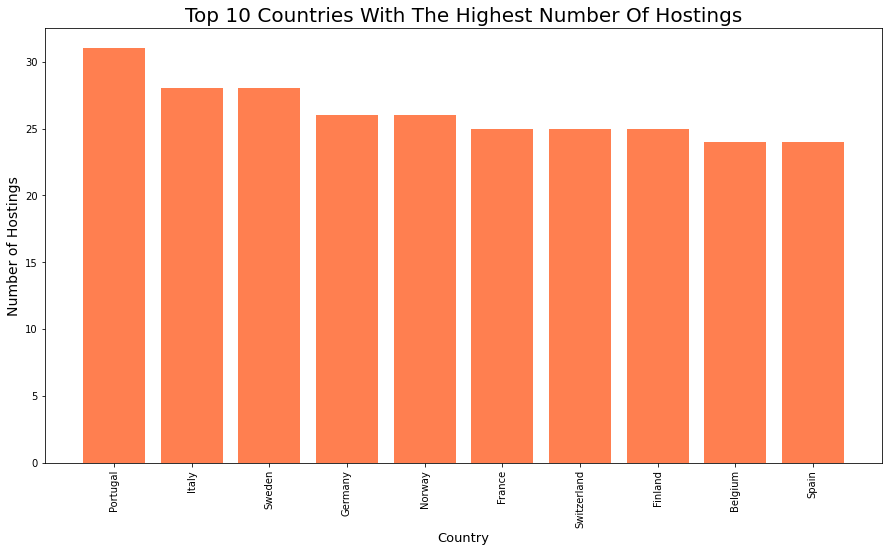

In [22]:
plt.figure(figsize=(15,8))
plt.bar(x=df_host['Host Country'], height=df_host['Number of Hosting'], color='coral')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hostings', fontsize=14)
plt.xticks(rotation=90)
plt.title('Top 10 Countries With The Highest Number Of Hostings', fontsize=20)
plt.show()

**Portugal hosted the highest number of games.**

In [23]:
win=[]
lose=[]
equal=[]
for x in df_results_copy['country'].unique():
    df_con=df_results_copy[df_results_copy['country']==x]
    df_home=df_con[df_con['home_team']==x]
    win.append(df_con[df_con['home_score']>df_con['away_score']]['date'].count())
    lose.append(df_con[df_con['home_score']<df_con['away_score']]['date'].count())
    equal.append(df_con[df_con['home_score']==df_con['away_score']]['date'].count())

In [24]:
df_chance=pd.DataFrame({'Host Country':df_results_copy['country'].unique(), 'Number of Winning':win, 'Number of Loosing':lose, 'Number of Equal':equal})

In [25]:
df_combined=pd.merge(df_chance,df_host, on='Host Country').sort_values(by='Number of Hosting', ascending=False)

In [26]:
df_combined.head()

,Host Country,Number of Winning,Number of Loosing,Number of Equal,Number of Hosting
7,Portugal,271,227,89,31
0,Italy,53,10,13,28
4,Sweden,63,22,21,28
2,Norway,47,7,9,26
8,Germany,70,15,16,26


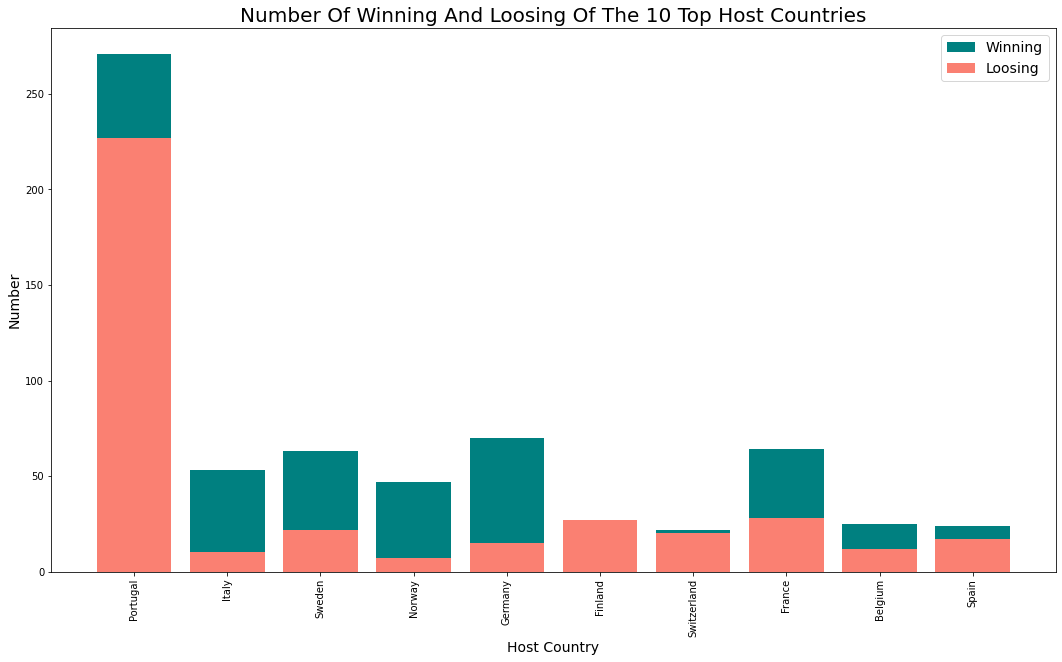

In [27]:
plt.figure(figsize=(18,10))
plt.bar(x=df_combined['Host Country'], height=df_combined['Number of Winning'], color='teal')
plt.bar(x=df_combined['Host Country'], height=df_combined['Number of Loosing'], color='salmon')
plt.legend(['Winning','Loosing'])
plt.xlabel('Host Country', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Winning', 'Loosing'], fontsize=14)
plt.title('Number Of Winning And Loosing Of The 10 Top Host Countries', fontsize=20)
plt.show()

**There are some countries which are hosting the match but they were not playing. Let's see what are these countries.**

In [28]:
host=[]
for x in df_results_copy['country'].unique():
        df_con=df_results_copy[df_results_copy['country']==x]
        host.append(df_con[(df_con['home_team']!=x) & (df_con['away_team']!=x)]['date'].count())

In [29]:
df_host_only = pd.DataFrame({'Host Country':df_results_copy['country'].unique(), 'Number of Only Hosting':host}).sort_values(by='Number of Only Hosting',ascending=False).head(10) 

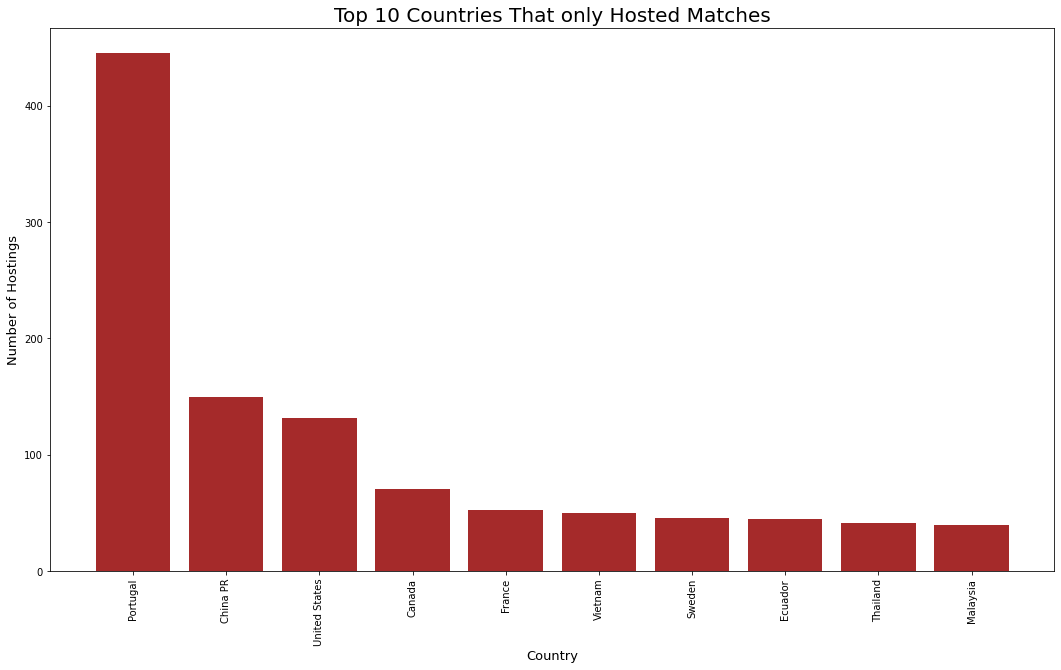

In [30]:
plt.figure(figsize=(18,10))
plt.bar(x=df_host_only['Host Country'], height=df_host_only['Number of Only Hosting'],color='brown')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hostings', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 10 Countries That only Hosted Matches', fontsize=20)
plt.show()

Portugal has hosted maximum number of games where they didn't play.

**Number of Tournaments Per Year**

In [31]:
number=[]
for x in df_results_copy['year'].unique():
    number.append(df_results_copy[df_results_copy['year']==x]['tournament'].nunique())

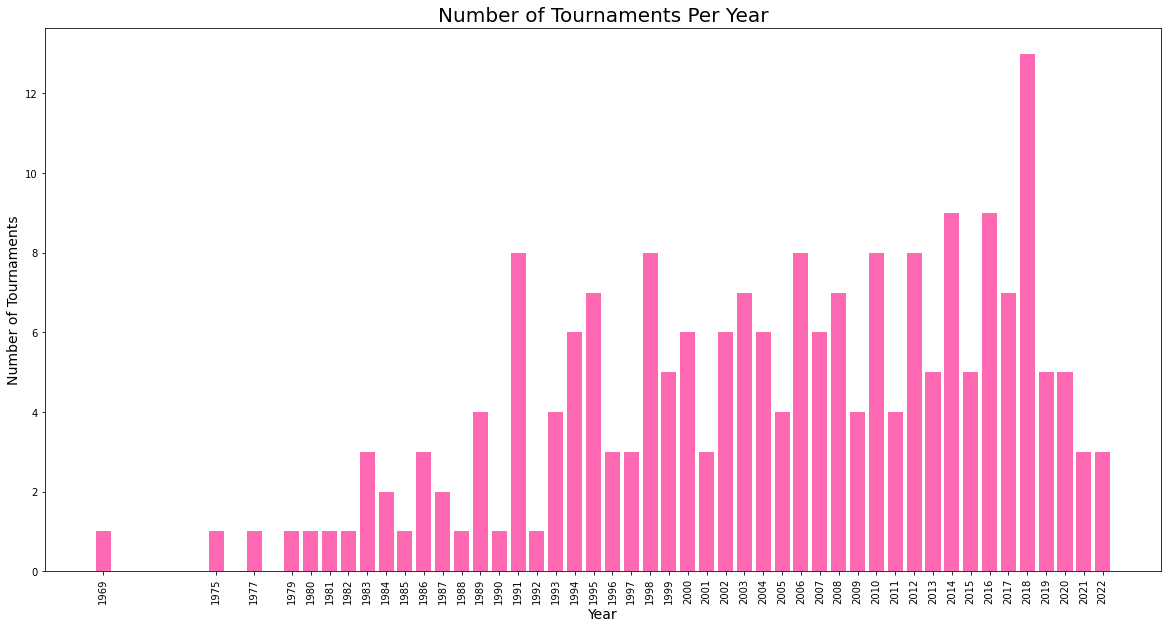

In [32]:
plt.figure(figsize=(20,10))
plt.bar(x=df_results_copy['year'].unique(), height=number,color='hotpink')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tournaments', fontsize=14)
plt.xticks(ticks=df_results_copy['year'].unique(),rotation=90)
plt.title('Number of Tournaments Per Year', fontsize=20)
plt.show()

**Different types of tournaments played**

In [35]:
tournaments=[]
for x in df_results_copy['tournament'].unique():
    tournaments.append(df_results_copy[df_results_copy['tournament']==x]['year'].nunique())

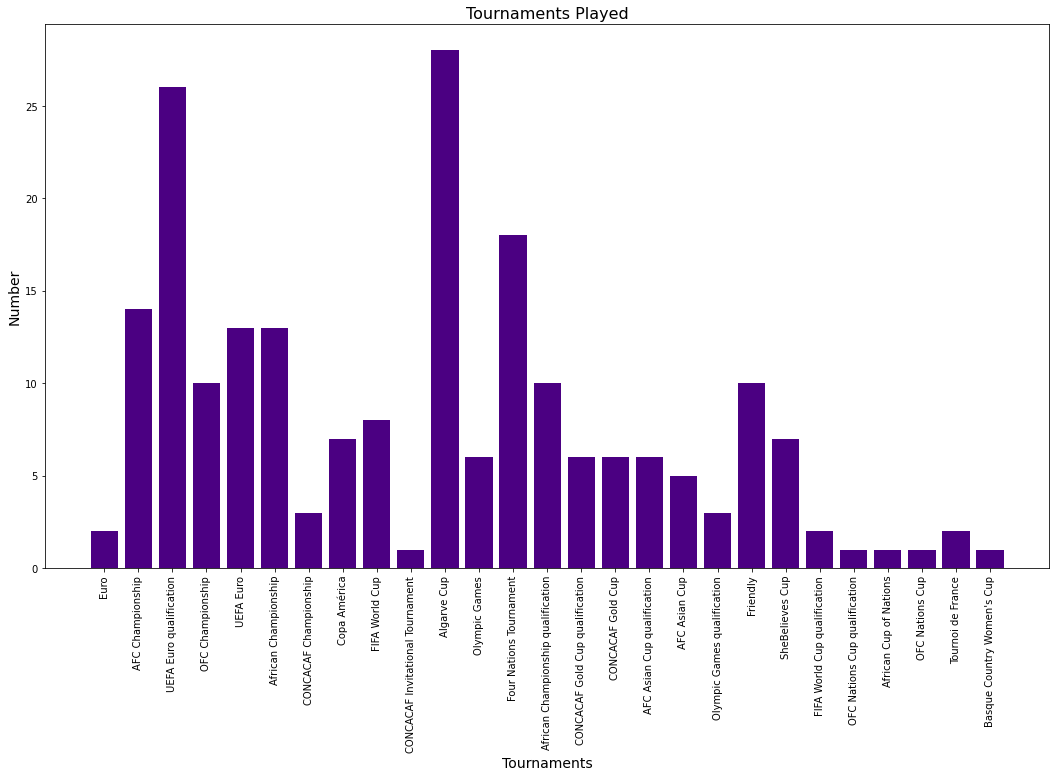

In [38]:
plt.figure(figsize=(18,10))
plt.bar(x=df_results_copy['tournament'].unique(),height=tournaments, color='indigo')
plt.xticks(rotation=90)
plt.title('Tournaments Played', fontsize=16)
plt.xlabel('Tournaments', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

**Overall Top 5 Performing Teams**

In [39]:
df_home_away=pd.DataFrame({'total_home_scores':home_data ,'total_away_scores':away_data})

In [40]:
df_home_away.isnull().sum()

total_home_scores    3
total_away_scores    3
dtype: int64

In [41]:
df_home_away.fillna(0, inplace=True)


In [42]:
df_home_away['total_scores']= df_home_away['total_home_scores'] + df_home_away['total_away_scores']

In [43]:
df_home_away_sorted=df_home_away.sort_values(by='total_scores', ascending=False).head(5)

In [44]:
df_home_away_sorted

,total_home_scores,total_away_scores,total_scores
United States,903.0,234.0,1137.0
Germany,471.0,304.0,775.0
Norway,446.0,246.0,692.0
China PR,487.0,155.0,642.0
Sweden,365.0,255.0,620.0


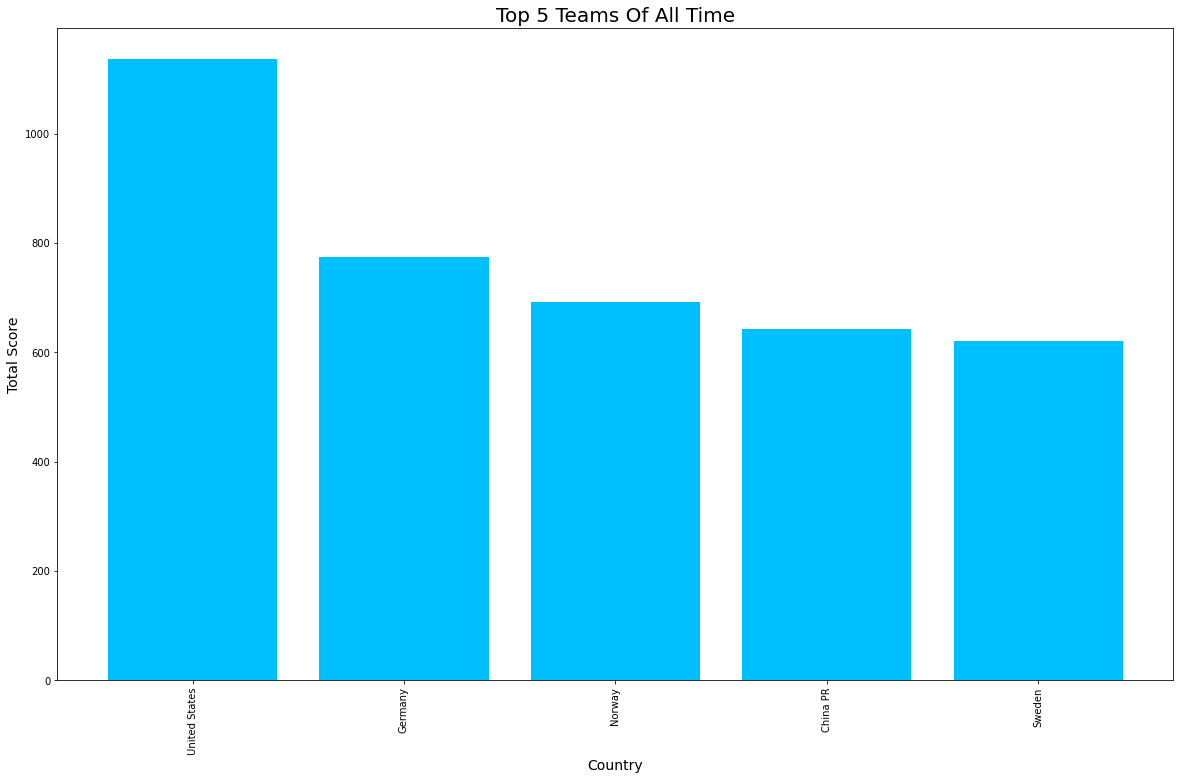

In [45]:
plt.figure(figsize=(20,12))
plt.bar(x=list(df_home_away_sorted.index), height=df_home_away_sorted['total_scores'],color='deepskyblue')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.title('Top 5 Teams Of All Time', fontsize=20)
plt.show()

## **Coclusions**

1. United States has maximum home score and Germany has maximum away score.
2. Portugal hosted the highest number of games.
3. Portugal has hosted maximum number of games where they didn't play.
4. Maximum number of tournaments were played in year 2018.
5. Algarve Cup is the most played tournament.
6. United States is the top performer among all the teams.